In [209]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

sns.set(style="darkgrid")

In [210]:
!pip install plotly

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Preparation

* focus is always to understand the final data structure
* support each step by visual analytics

## Data on COVID-19 (coronavirus) by Our World in Data


In [211]:
#data_path='../data/raw/COVID-19/owid-covid-data.csv'
data_path="https://covid.ourworldindata.org/data/owid-covid-data.csv"
pd_raw=pd.read_csv(data_path)

In [212]:
pd_raw.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [213]:
#time_idx=pd_raw.columns[4:]
pd_raw.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [214]:
#Visulizing some data 
data=pd_raw.iloc[:,2:4] 
data.head()

,location,date
0,Afghanistan,2020-02-24
1,Afghanistan,2020-02-25
2,Afghanistan,2020-02-26
3,Afghanistan,2020-02-27
4,Afghanistan,2020-02-28


In [216]:
#Extracting required data from the dataset. 
#Data staking
data=data.assign(total_cases=pd_raw.iloc[:,4])
data=data.assign(vaccination_rate=pd_raw.iloc[:,42])
data=data.assign(population=pd_raw.iloc[:,48])
data.head()

,location,date,total_cases,vaccination_rate,population
0,Afghanistan,2020-02-24,5.0,NaN,39835428.0
1,Afghanistan,2020-02-25,5.0,NaN,39835428.0
2,Afghanistan,2020-02-26,5.0,NaN,39835428.0
3,Afghanistan,2020-02-27,5.0,NaN,39835428.0
4,Afghanistan,2020-02-28,5.0,NaN,39835428.0


In [217]:
#Generating relative cases by deviding total_cases by population
relative_cases=data.total_cases/data.population

In [218]:
#Stacking genertaed relative case data
data=data.assign(relative_cases=relative_cases)
data.head()

,location,date,total_cases,vaccination_rate,population,relative_cases
0,Afghanistan,2020-02-24,5.0,NaN,39835428.0,1.255164e-07
1,Afghanistan,2020-02-25,5.0,NaN,39835428.0,1.255164e-07
2,Afghanistan,2020-02-26,5.0,NaN,39835428.0,1.255164e-07
3,Afghanistan,2020-02-27,5.0,NaN,39835428.0,1.255164e-07
4,Afghanistan,2020-02-28,5.0,NaN,39835428.0,1.255164e-07


In [246]:
data.columns

Index(['location', 'date', 'total_cases', 'vaccination_rate', 'population',
       'relative_cases'],
      dtype='object')

In [247]:
#exmample df.pivot(index='foo', columns='bar', values='baz')
#Extracting required data only for ploting "Figure.1: relative cases". Arrange date and locations
graph_ralativecases=data.pivot(index='date', columns='location', values='relative_cases')
graph_ralativecases.head()

location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
#Extracting required data only for ploting "Figure.2: The Vaccination rate". Arrange date and locations
graph_vaccination_rate=data.pivot(index='date', columns='location', values='vaccination_rate')
graph_vaccination_rate.head()

location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [266]:
#example DataFrame.filter(self, items=None, like=None, regex=None, axis=None)         
graph_vaccination_rate=graph_vaccination_rate.filter(items=['India','Germany','Pakistan'], axis=1) #Filter only three country
graph_vaccination_rate.to_csv('../data/processed/vaccination_rate.csv',index=True)  #Creating .csv file of countries

In [267]:
graph_ralativecases=graph_ralativecases.filter(items=['India','Germany','Pakistan'], axis=1)
graph_ralativecases.to_csv('../data/processed/relative_cases.csv',index=True)

<Figure size 1152x648 with 0 Axes>

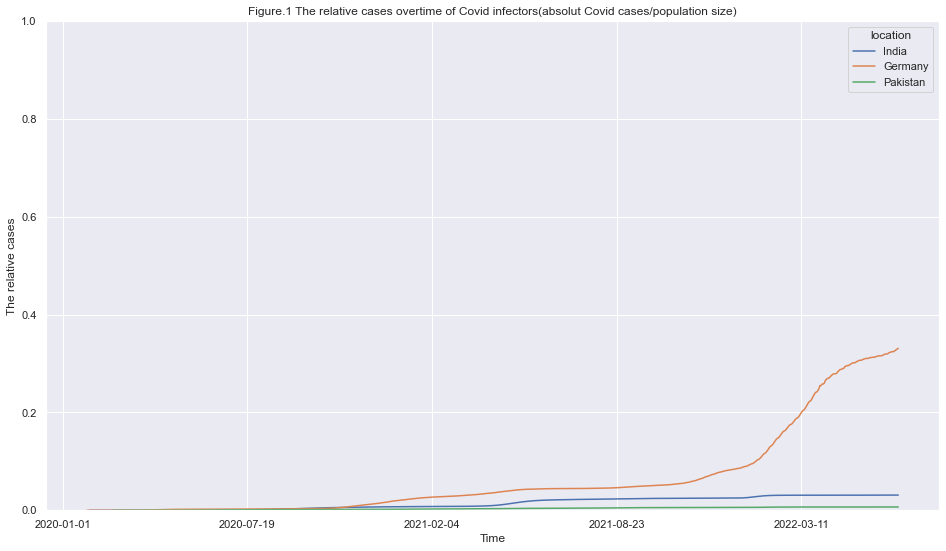

In [268]:
# Figure1
plt.figure();
ay=graph_ralativecases.plot()
plt.ylim(0,1)
plt.xlabel("Time")
plt.ylabel("The relative cases")
plt.title("Figure.1 The relative cases overtime of Covid infectors(absolut Covid cases/population size)")
fig1 = ay.get_figure()
fig1.savefig('../reports/figures/Figure1.png')

<Figure size 1152x648 with 0 Axes>

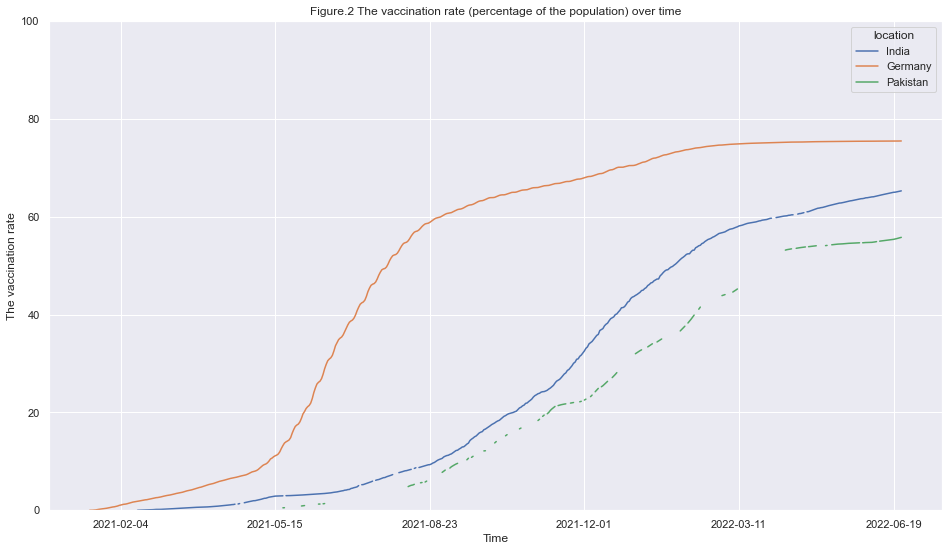

In [269]:
# Figure2
plt.figure();
ax=graph_vaccination_rate.plot()
plt.ylim(0,100)
plt.xlabel("Time")
plt.ylabel("The vaccination rate")
plt.title("Figure.2 The vaccination rate (percentage of the population) over time")
fig = ax.get_figure()
fig.savefig('../reports/figures/Figure2.png')